## 课堂代码
####  Part-02 Logstic Regression
1. Data 
+ Pre-processing 
+ Feature-Extractor
+ Split Training, Test, Validation
+ Build Model
+ Gradient Descent 
+ Evaluation
+ Predicat
+ Analysis

#### Minist识别0或者6

#### Pre-processing 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from struct import unpack

In [12]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [40]:
Path = 'C:\\Users\\mengke.yan\\Desktop\\code\\dataset\\'
test_x, test_y = loadmnist( f'{Path}t10k-images-idx3-ubyte', f'{Path}t10k-labels-idx1-ubyte')

In [41]:
train_x, train_y = loadmnist(f'{Path}train-images-idx3-ubyte', f'{Path}train-labels-idx1-ubyte')

In [42]:
# 784 = 28*28
train_x.shape

(60000, 784)

In [43]:
test_x.shape

(10000, 784)

In [44]:
test_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
test_y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [46]:
test_x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [47]:
np.reshape(test_x[0],(28,28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

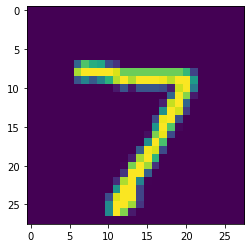

In [48]:
plt.imshow(np.reshape(test_x[0],(28,28)))

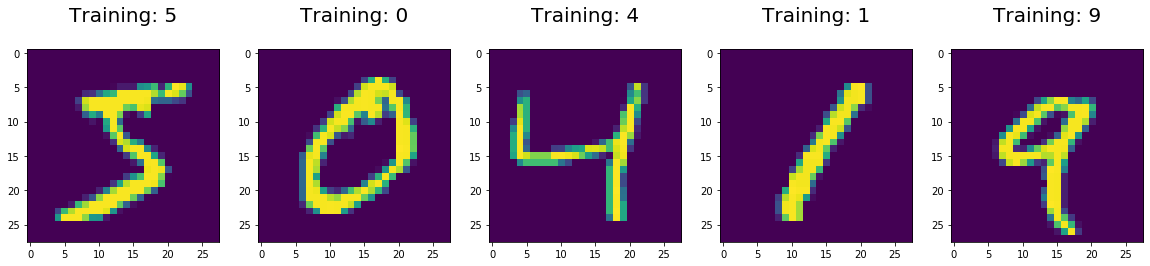

In [49]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_x[0:5], train_y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)))
    plt.title('Training: %i\n' % label, fontsize = 20)

#### we only choose label with 0 and 6

In [50]:
zero_train_indices = np.where(train_y == 0)
one_train_indices = np.where(train_y == 6)
train_indices = np.concatenate((zero_train_indices[0], one_train_indices[0]))

zero_test_indices = np.where(test_y == 0)
one_test_indices = np.where(test_y == 6)
test_indices = np.concatenate((zero_test_indices[0], one_test_indices[0]))

In [51]:
train_indices = np.random.choice(train_indices, size=len(train_indices), replace=False)
test_indices = np.random.choice(test_indices, size=len(test_indices), replace=False)

In [52]:
val_ratio = 0.2

train_indices = train_indices[: int(len(train_indices) * (1 - val_ratio))]
val_indices = train_indices[int(len(train_indices) * (1 - val_ratio)):]

In [53]:
binary_x_train = train_x[train_indices]
binary_x_test = test_x[test_indices]
binary_x_val = train_x[val_indices]

binary_y_val = train_y[val_indices]
binary_y_train = train_y[train_indices]
binary_y_test = test_y[test_indices]

In [54]:
import random

In [55]:
binary_y_train

array([6, 6, 6, ..., 0, 6, 6], dtype=uint8)

Text(0.5, 1.0, 'Training: 6\n')

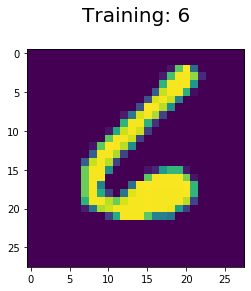

In [56]:
plt.imshow(np.reshape(binary_x_train[1], (28,28)))
plt.title('Training: %i\n' % binary_y_train[1], fontsize = 20)

#### 我们没有做标准化/归一化
+ 原因：数据比较简单，效果已经比较好了
+ 当遇到比较复杂的问题时，一定要做标准化/归一化

In [57]:
from collections import Counter

In [58]:
Counter(binary_y_train)

Counter({6: 4690, 0: 4782})

In [59]:
Counter(binary_y_test)

Counter({0: 980, 6: 958})

In [60]:
Counter(binary_y_val)

Counter({6: 956, 0: 939})

#### Build Model

#### sklearn logistic regression
+ 网址：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
# L-BFGS-B – Software for Large-scale Bound-constrained Optimization 对于很大数据量的一个优化，否则784维，运行起来很慢

In [63]:
clf.fit(binary_x_train, binary_y_train) # fit输入数据，梯度下降，迭代的求解过程

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
clf.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.28704678e-06,  1.37664645e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.41401607e-07,
         8.49900009e-07,  1.02630253e-05,  2.33486592e-05,
         6.67607033e-05,  3.84728690e-04,  3.12998530e-03,
         9.98495365e-03,  4.75163908e-03, -2.34787795e-04,
         7.67701693e-04, -8.34737335e-03, -2.27386397e-02,
        -1.02770296e-02,  3.37290884e-04,  2.23692623e-04,
         1.23640366e-04,  1.83972127e-04,  8.45060391e-0

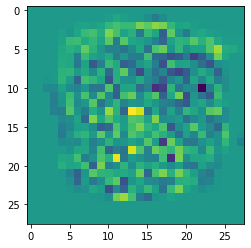

In [67]:
# 可视化权重，颜色深的地方代表对识别0还是6的重要程度，右上角是识别0还是6很重要的一个地方
plt.imshow(np.reshape(clf.coef_,(28,28)))

In [65]:
clf.intercept_

array([0.00050201])

In [66]:
# Accuracy
??clf.score

In [68]:
clf.score(binary_x_train, binary_y_train)

1.0

In [69]:
clf.score(binary_x_val, binary_y_val)

1.0

In [71]:
binary_x_test.shape

(1938, 784)

In [72]:
binary_y_test.shape

(1938,)

In [70]:
# 典型的过拟合，train,val表现都很好，test表现一般
clf.score(binary_x_test, binary_y_test)

0.9850361197110423

In [73]:
predicated_result = clf.predict(binary_x_test)

In [74]:
# 测试集中，预测错的地方
np.where(binary_y_test != predicated_result)

(array([ 115,  126,  417,  513,  603,  618,  621,  626,  672,  691,  697,
         762,  960,  982,  986,  995, 1073, 1128, 1182, 1202, 1364, 1413,
        1481, 1551, 1688, 1694, 1792, 1834, 1868], dtype=int64),)

Text(0.5, 1.0, 'Actual Value: 6 ; Predict Value: 0 \n')

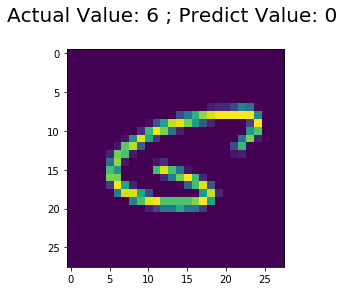

In [76]:
lookup_index = 126

plt.imshow(np.reshape(binary_x_test[lookup_index], (28,28)))
plt.title('Actual Value: {} ; Predict Value: {} \n'.format(binary_y_test[lookup_index], predicated_result[lookup_index]), fontsize = 20)

In [77]:
from sklearn import metrics

In [78]:
binary_y_test[0]

0

In [79]:
predicated_result[0]

0

In [80]:
metrics.precision_score(binary_y_test, predicated_result, average='macro')

0.9850980730569965

In [81]:
metrics.precision_score(binary_y_test, predicated_result, pos_label=6)

0.9884332281808622

In [82]:
metrics.recall_score(binary_y_test, predicated_result, pos_label=6)

0.9812108559498957

In [83]:
fpr, tpr, threshold = metrics.roc_curve(binary_y_test, predicated_result, pos_label=6)

In [84]:
metrics.auc(fpr, tpr)

0.9849931830769887

In [85]:
cm = metrics.confusion_matrix(binary_y_test, predicated_result)

In [86]:
import seaborn as sn

In [87]:
??sns.heatmap

In [88]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix(binary_y_test, predicated_result)

In [89]:
data

array([[969,  11],
       [ 18, 940]], dtype=int64)

In [90]:
df_cm = pd.DataFrame(data, columns=np.unique(binary_y_test), index = np.unique(binary_y_test))

# 
# 
# plt.figure(figsize = (10,7))
# sn.set(font_scale=1.4)#for label size
# sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [91]:
df_cm.index.name = 'Actual'

In [92]:
df_cm.columns.name = 'Predicted'

#### 混淆矩阵的特殊用法
+ 银行打电话，是否要办理信用卡分期业务，简单且好用的方法，根据已有数据，预测你是否会办理该业务，建立好模型后，银行只需要给实际上没办过但预测出来办过的人打电话，即可大大提高成单率

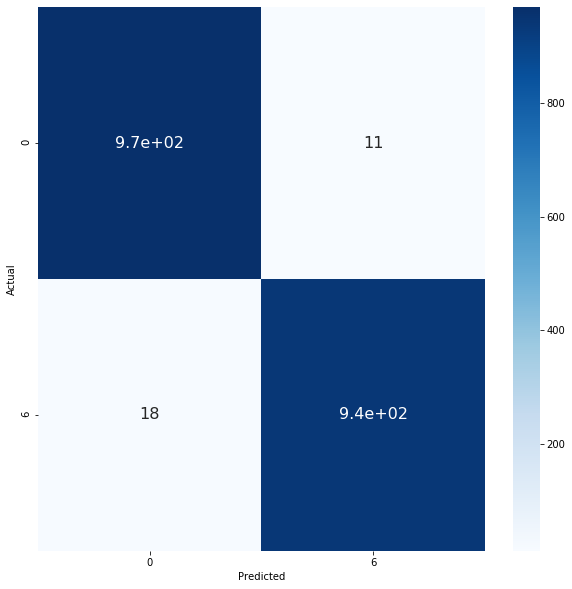

In [93]:
plt.figure(figsize=(10, 10))
sn.heatmap(df_cm, cmap='Blues', annot=True, annot_kws={"size": 16})

## 课后习题
## 导入项目相关库
&emsp;&emsp;我们需要使用pandas进行数据处理，使用sklearn进行数据划分、标准化、模型预测等操作，使用matplotlib绘制相关图表。<br>

In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 导入数据
&emsp;&emsp;数据文件已保存在'dataSet/heart.csv'，我们可以使用read_csv函数将数据集读到内存中。<br>

In [207]:
# 读取数据集
dataPath = 'D:\\Project\\Study\\BI\\007\\bi-hx\\4\\heart.csv'
data = pd.read_csv(dataPath)

## 了解数据集
&emsp;&emsp;首先让我们来看看数据内容，以便对数据集有个初步了解。

In [208]:
# 使用.head()函数可以查看数据集的头部数据
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [209]:
# 使用.info()函数可以查看数据集的主要信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [210]:
# 使用.describe()函数可以查看数据的统计信息
# 统计信息包括总数、均值、方差、最小值、第一四分位数、第二四分位数、第三四分位数、最大值。
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


([<matplotlib.patches.Wedge at 0x158df803408>,
 [Text(-0.1604426989002982, 1.1387528881937419, 'Sick'),
  Text(0.16044280551803777, -1.1387528731720071, 'Not sick')],
 [Text(-0.07673346469144694, 0.5446209465274416, '54.5%'),
  Text(0.0767335156825398, -0.5446209393431338, '45.5%')])

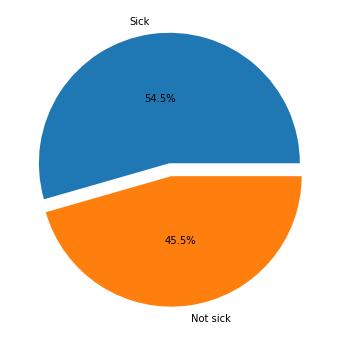

In [211]:
# 下面我们来看一看303人里有多少人被确诊为病患。
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=data['target'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=['Sick', 'Not sick'], pctdistance=0.5)

*Tips：一般来说，在数据处理或模型预测之前，我们可以检查一下各项特征的相关系数，如果有两个特征之间的相关系数极高，则代表这两个特征内容高度重复，或许可以在特征筛选的时候删除其一；如果某个特征与被预测项之间的相关系数极高，则代表这个特征很重要，需要保留。*

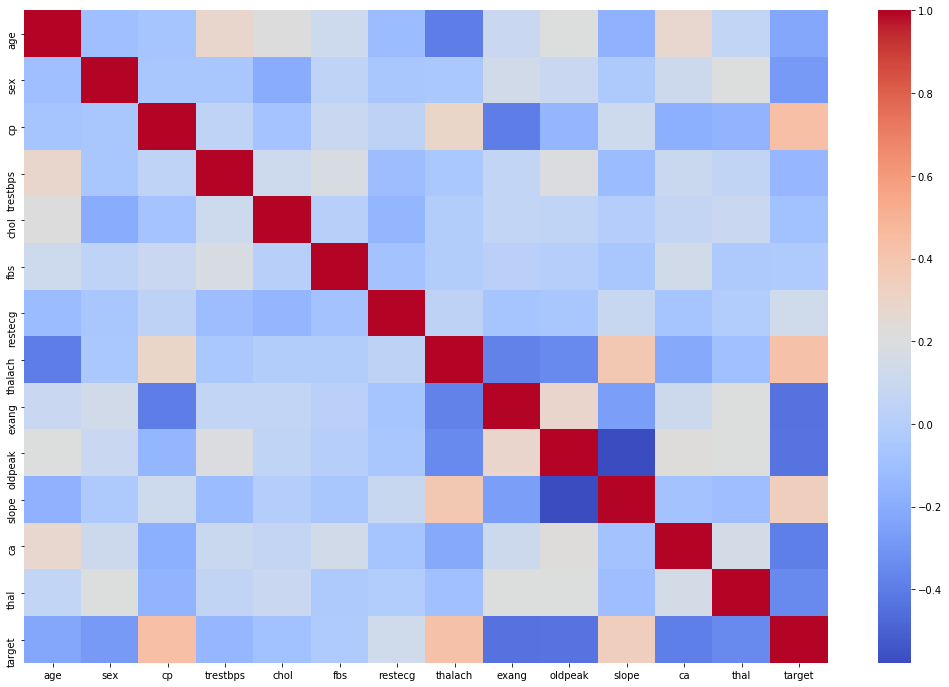

In [212]:
# 查看特征相关系数图
# 颜色越暖代表相关系数越高；颜色越冷代表相关系数越低。
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
sns.heatmap(data.corr(),ax= ax, cmap='coolwarm');

In [213]:
# 查看特征之间的相关系数具体数值
data.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## 数据处理
### 问题1：Onehot编码（10分）
&emsp;&emsp;<font color=red>请对data数据中需要进行Onehot的特征列，进行Onehot编码处理。</font><br>

In [214]:
######## your code ########
data = pd.get_dummies(data, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
# Onehot_data = data.iloc[:,6:]
# Onehot_data
######## your code ########

In [197]:
x_data_O = data.iloc[:,6:]
x_data_O

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
299,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,0,1,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
301,0,1,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


&emsp;&emsp;打印数据info，查看数据列变化。<br>

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_0      303 non-null    uint8  
 7   sex_1      303 non-null    uint8  
 8   cp_0       303 non-null    uint8  
 9   cp_1       303 non-null    uint8  
 10  cp_2       303 non-null    uint8  
 11  cp_3       303 non-null    uint8  
 12  fbs_0      303 non-null    uint8  
 13  fbs_1      303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  exang_0    303 non-null    uint8  
 18  exang_1    303 non-null    uint8  
 19  slope_0    303 non-null    uint8  
 20  slope_1   

### 问题2：数据、标签划分（10分）
&emsp;&emsp;<font color=red>请对data数据进行标签划分，划分出x_data（Data）与y_data(Laber)。</font><br>

In [216]:
######## your code ########
x_data = data.drop(columns=['target'])
y_data = data.loc[:,'target']
######## your code ########

In [217]:
x_data

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [218]:
y_data

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### 问题3：归一化处理（20分）
&emsp;&emsp;<font color=red>请对所有数据列进行归一化处理。</font><br>

In [228]:
######## your code ########
# 标准化器定义
scaler = StandardScaler()
# 标准化器训练
scaler.fit(x_data)
# print(scaler.mean_)
# 去除经过One-hot处理的数据
x_data_S = x_data.loc[:,['age','trestbps','chol','thalach','oldpeak']]
# 使用标准化器对数据进行标准化
x_data_S = scaler.fit_transform(x_data_S)
# print(scaler.transform(x_data))
######## your code ########

In [225]:
x_data_S

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

### 问题4：训练、测试集划分（10分）
&emsp;&emsp;<font color=red>请补全下列代码，将x_data、y_data划分成X_train,X_test,y_train,y_test，其中test占30%。</font><br>

In [229]:
np.mean(x_data_S, axis=0)

array([ 4.69005106e-17, -7.03507659e-16, -1.11388713e-16, -6.80057404e-16,
        2.34502553e-17])

In [230]:
np.std(x_data_S, axis=0)

array([1., 1., 1., 1., 1.])

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_0      303 non-null    uint8  
 7   sex_1      303 non-null    uint8  
 8   cp_0       303 non-null    uint8  
 9   cp_1       303 non-null    uint8  
 10  cp_2       303 non-null    uint8  
 11  cp_3       303 non-null    uint8  
 12  fbs_0      303 non-null    uint8  
 13  fbs_1      303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  exang_0    303 non-null    uint8  
 18  exang_1    303 non-null    uint8  
 19  slope_0    303 non-null    uint8  
 20  slope_1   

In [233]:
x_data_O = data.iloc[:,6:]
x_data_O

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
299,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,0,1,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
301,0,1,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [236]:
x_data = np.concatenate((x_data_S, x_data_O), axis=1)
x_data[0]

array([ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ])

In [237]:
######## your code ########
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3, random_state=33)
######## your code ########

In [247]:
X_train.shape

(212, 30)

In [249]:
X_test.shape

(91, 30)

### 问题5：模型定义、训练及评估（30分）
&emsp;&emsp;请完成LogisticRegression模型的定义、训练及评估。<br>
&emsp;&emsp;<font color=red>请定义一个LogisticRegression模型</font>

In [240]:
######## your code ########
# 模型定义：
model = LogisticRegression()
# # 模型训练：
# clf.fit(X, y)
# # 模型预测：
# clf.predict(X[:2, :])
# array([0, 0])
# # 模型评估：
# clf.score(X, y)
######## your code ########

&emsp;&emsp;<font color=red>请使用训练数据对LogisticRegression模型进行训练</font>

In [241]:
######## your code ########
model.fit(X_train, y_train)
######## your code ########

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

使用训练数据对模型进行评估

In [242]:
model.score(X_train,y_train)

0.8867924528301887

&emsp;&emsp;<font color=red>请参照用训练数据评估的方式，使用测试数据对模型进行评估</font>

In [243]:
######## your code ########
model.score(X_test,y_test)
######## your code ########

0.8351648351648352

### 问题6：检查主要评价指标（20分）

In [244]:
y_predict = model.predict(X_test)

&emsp;&emsp;<font color=red>请使用主要评价指标对模型进行评价。</font><br>

In [250]:
######## your code ########
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1']
# print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_test, y_predict, target_names=target_names))
######## your code ########

              precision    recall  f1-score   support

     class 0       0.89      0.80      0.84        50
     class 1       0.78      0.88      0.83        41

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



In [251]:
model.coef_

array([[-0.01596829, -0.41498016, -0.26561038,  0.38146281, -0.45470329,
         0.62191226, -0.62193413, -0.97961885, -0.24572286,  0.65993796,
         0.56538188, -0.2639866 ,  0.26396473, -0.0872072 ,  0.20864598,
        -0.12146065,  0.40410345, -0.40412532, -0.31384829, -0.2986751 ,
         0.61250152,  1.22785629, -0.4915959 , -0.83076561,  0.04964662,
         0.04483673, -0.36553113,  0.52010376,  0.59202932, -0.74662382]])

In [253]:
model.intercept_

array([0.17796911])